<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b>  Retail Industry 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                                      
                    <b> 
                    <br>    
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  Supervised Learning - Regression  
                    </b>
                </font>
            </div>
         </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Author 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Rubina Bansal

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Business Requirement
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available. 

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Data Dictionary    
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Store** : The store number

**Date** : The week of sales

**Weekly_Sales** : Sales for the given store

**Holiday_Flag** : Whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature** : Temperature on the day of sale

**Fuel_Price** : Cost of fuel in the region

**CPI** : Prevailing consumer price index

**Unemployment** : Prevailing unemployment rate

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Content
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* ##### [1. Import Libraries](#libraries)
* ##### [2. Data Understanding](#understanding)
* ##### [3. Explorator Data Analysis](#eda)
  * ##### [3.1 Distribution of Target](#target)  
  * ##### [3.2 Relation between Target and independent features](#relation)
  * ##### [3.3 Correlation among numerical attributes](#correlation)  
  * ##### [3.4 Univariate analysis of numerical attributes](#numerical)  
  * ##### [3.5 Univariate analysis of cateogrical attributes](#categorical)
  * ##### [3.6 Bivariate analysis of attributes (Numerical vs Categorical)](#catvsnum)  
  * ##### [3.7 Bivariate analysis of attributes (Categorical vs Categorical)](#catvscat) 
* ##### [4. Data Preprocessing](#preprocessing)
  * ##### [4.1 Encoding categorical features](#encoding)
  * ##### [4.2 Splitting dataset into train set and test set](#split)
* ##### [5. Model Developement](#model_development)
* ##### [6. Model Evaluation](#model_evaluation)

<a id="libraries"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Import libraries
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
#import numpy for mathematical operations
import numpy as np

import pandas as pd

#import matplot for visualization tools
import matplotlib.pyplot as plt

#import seaborn for advanced visualization tools
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

#import categorical encoder
#import category_encoders as ce
#from category_encoders import BinaryEncoder
#import category_encoders as ce
import statsmodels

#import statsmodels for OLS model
import statsmodels.api as sm

#import statsmodels for model building
import statsmodels.stats.api as sms

#import stats module to perform statistical operations
from scipy import stats

#import Recursive Feature Selection
from sklearn.feature_selection import RFE, RFECV

#import Sequential Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#import Polynomial Features for feature engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("walmart.csv")
df = data.copy()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<a id="understanding"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  DATA UNDERSTANDING  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


- We will first extract day, month and year from the date column for easier analysis
- Then we will change the data types of:   <br>
date column from object to date            <br>
Holiday_Flag from int64 to object

In [5]:
# Convert the date_column to a datetime data type, extract the year, month and day; and create a new columns for each of them
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [6]:
#dropping date
df = df.drop(['Date'], axis=1)

In [7]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


#### changing the datatypes

In [8]:
#df['Date'] = pd.to_datetime(df['Date'])
df['Store'] = df['Store'].astype('object')
df['Year'] = df['Year'].astype('object')
df['Month'] = df['Month'].astype('object')
df['Day'] = df['Day'].astype('object')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   object 
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   object 
 8   Month         6435 non-null   object 
 9   Day           6435 non-null   object 
dtypes: float64(5), object(5)
memory usage: 502.9+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


* weekly_sales column has outliers
* Temperature column has some negative values
* CPI column has outliers

In [11]:
df.describe(include='object').T

,count,unique,top,freq
Store,6435,45,1,143
Holiday_Flag,6435,2,0,5985
Year,6435,3,2011,2340
Month,6435,12,4,630
Day,6435,31,2,270


##### check for duplicates

In [12]:
df.duplicated().sum()

0

##### missing values

In [13]:
Total = (df.isnull().sum()).sort_values(ascending=False)
Percentage = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total','Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
Store,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0
Year,0,0.0
Month,0,0.0
Day,0,0.0


<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  EXPLORATORY DATA ANALYSIS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

- max sales in 2011
- max sales in april(4), July(7), September(9), October(10)
- beginning of the month 2,3 highest sales

<a id="target"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.5px>                   
                    <b>  CHECKING DISTRIBUTION OF THE TARGET VARIABLE
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

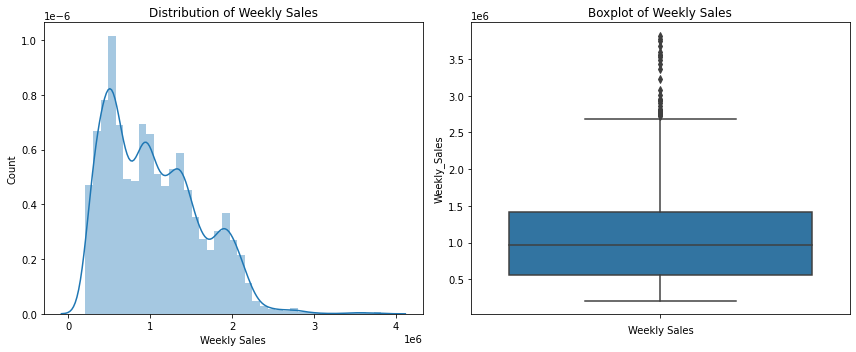

In [15]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "Weekly_Sales" column
sns.distplot(df['Weekly_Sales'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Weekly Sales")
axes[0].set_xlabel("Weekly Sales")
axes[0].set_ylabel("Count")

# Boxplot plot for the "Weekly Sales" column
sns.boxplot(data=df, y='Weekly_Sales',ax=axes[1])
axes[1].set_title("Boxplot of Weekly Sales")
axes[1].set_xlabel("Weekly Sales")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

* The distribution is positively skewed.
* There are few outliers observed on the upper side of the central distribution.

#### NORMALIZING THE TARGET VARIABLE

In [16]:
df['Weekly_Sales'] = np.log(df['Weekly_Sales'])
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,14.312455,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,14.311400,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,14.292966,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,14.158907,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,14.256862,0,46.50,2.625,211.350143,8.106,2010,5,3


<a id="relation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Linear Relationship between Target (Weekly Sales) and other numerical columns
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.092519,0.018771,-0.077481,-0.079817
Temperature,-0.092519,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.018771,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.077481,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.079817,0.101158,-0.034684,-0.302020,1.000000


### heatmap

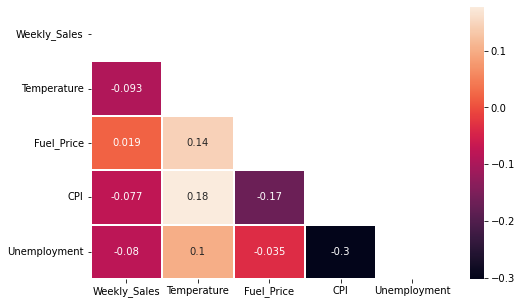

In [18]:
plt.figure(figsize=(8,5))
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, mask=mask, linewidths=2)
plt.show()

### INSIGHTS:

<a id="numerical"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  UNI-VARIATE ANALYSIS FOR NUMERICAL COLUMNS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Boxplot for numerical variables

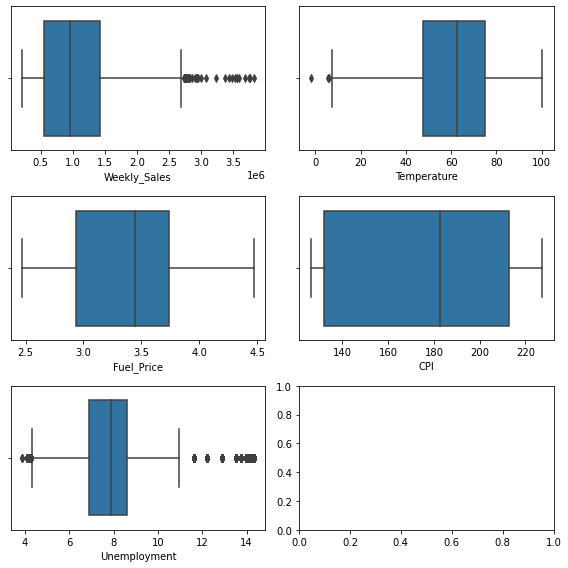

In [19]:
#create axis for subplots
fig, ax = plt.subplots(3,2, figsize=(8,8))

#display box plots for numeric features
for var,subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df_num[var], ax=subplot)
    
plt.tight_layout()
plt.show()

- Unemployment and temperature column has outliers that need to be handled.

### Distribution of numeric columns

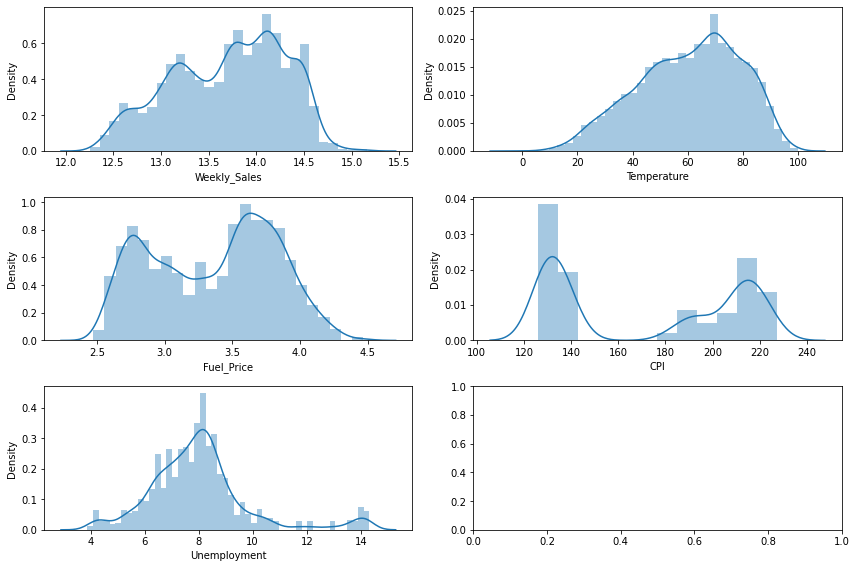

In [20]:
fig, ax = plt.subplots(3,2, figsize=(12,8))

for var,subplot in zip(df_num.columns, ax.flatten()):
    sns.distplot(df[var], ax=subplot)
    
plt.tight_layout()
plt.show()

In [21]:
df_num.skew()

Weekly_Sales    0.668362
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

<a id="categorical"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  UNI-VARIATE ANALYSIS FOR CATEGORICAL COLUMNS  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### countplots for categorical data

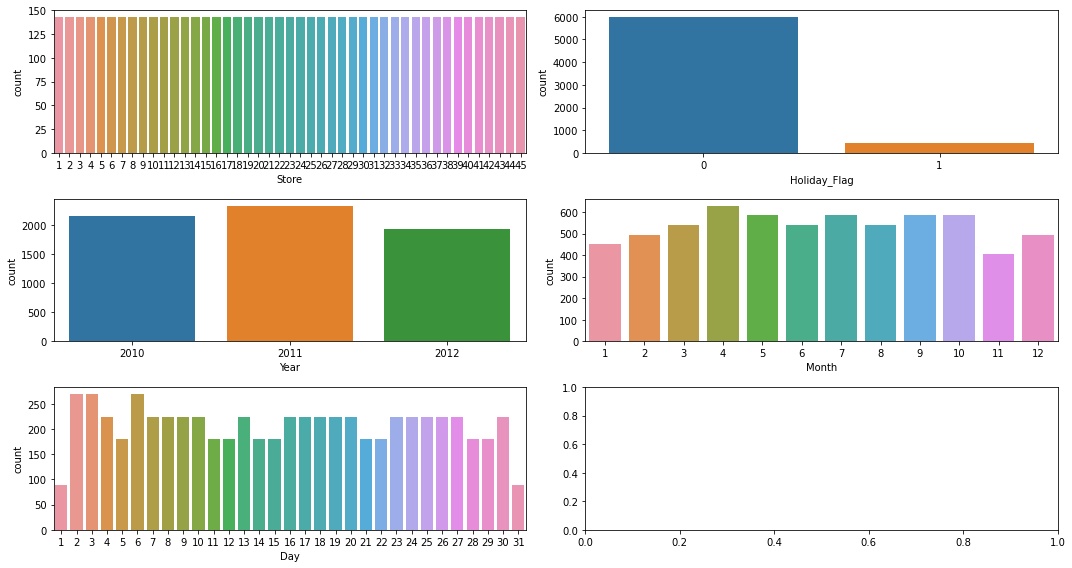

In [22]:
fig, ax = plt.subplots(3,2, figsize=(15,8))

for var, subplot in zip(df_cat.columns, ax.flatten()):
    sns.countplot(df_cat[var], ax=subplot)
    
plt.tight_layout()
plt.show()

<a id="catvsnum"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  BI-VARIATE ANALYSIS FOR TARGET VS NUMERICAL COLUMNS  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### scatterplot between target and independent numeric variables

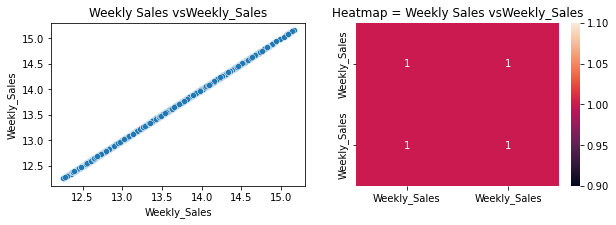

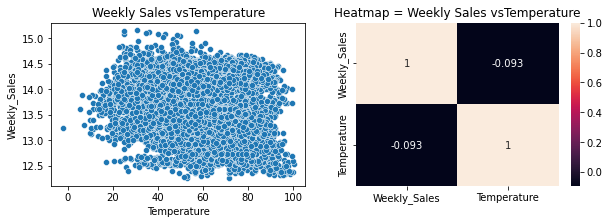

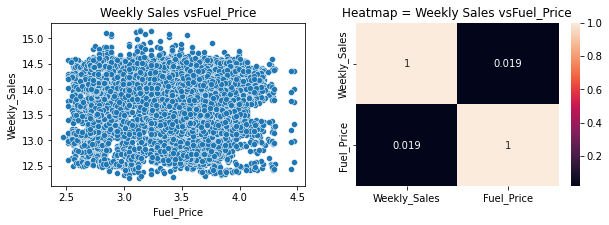

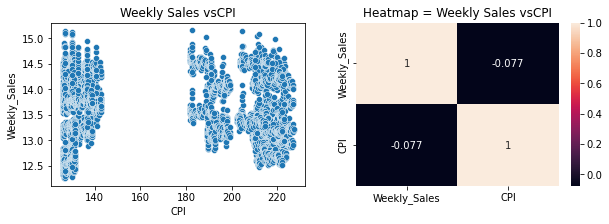

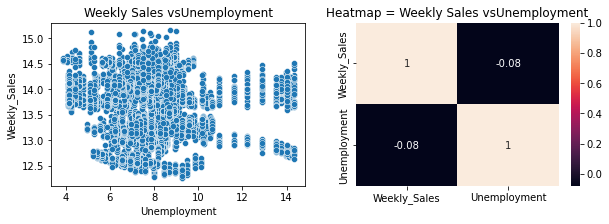

In [23]:
for col in df_num.columns:
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    
    #scatterplot using seaborn
    sns.scatterplot(x=df[col], y=df['Weekly_Sales'], ax=axes[0])
    axes[0].set_title('Weekly Sales vs' + col)
    axes[0].set_xlabel(col)
    axes[0].set_label('Weekly Sales')
    
    #heatmap using seaborn
    sns.heatmap(df[['Weekly_Sales',col]].corr(), annot=True, ax = axes[1])
    plt.title('Heatmap = Weekly Sales vs' + col)
    
    plt.show()

<a id="catvscat"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  BI-VARIATE ANALYSIS OF WEEKLY SALES VS CATEGORICAL COLUMNS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


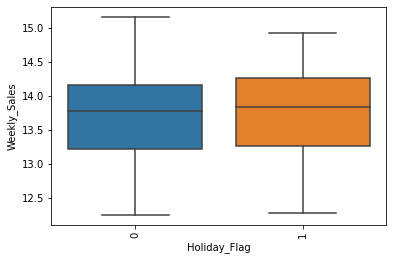

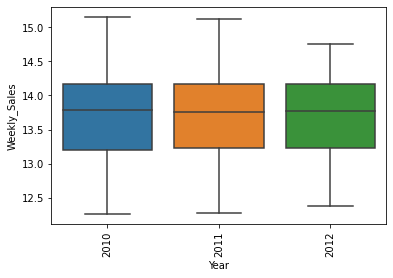

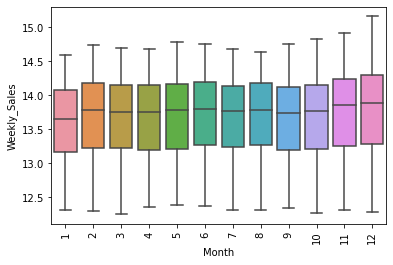

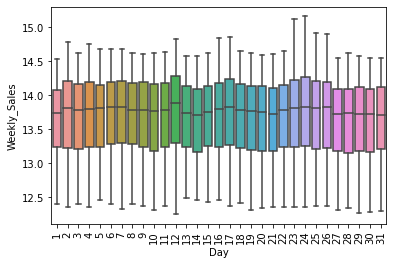

In [24]:
for col in df_cat.columns[1:]:
    sns.boxplot(x=df[col], y=df['Weekly_Sales'])
    plt.xticks(rotation=90)
    plt.show()

- weekly sales has a slightly higher average if the week was a holiday week

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  BI-VARIATE ANALYSIS FOR CATEGORICAL VS CATEGORICAL COLUMNS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

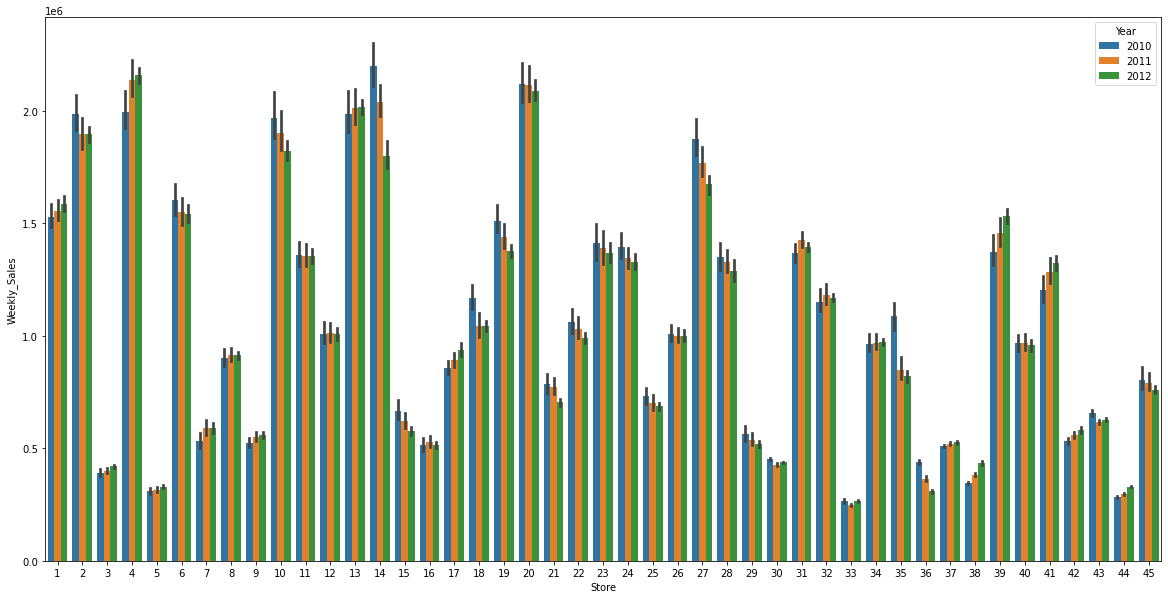

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_cat["Store"],y=df_num["Weekly_Sales"],hue=df_cat["Year"])
plt.show()

<a id="preprocessing"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  DATA PREPROCESSING FOR MODEL BUILDING
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="encoding"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  SCALING NUMERICAL VARIABLES
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
ss = StandardScaler()
df_num = df_num.drop(["Weekly_Sales"],axis=1)
df_num_scaled = ss.fit_transform(df_num)
df_num_scaled = pd.DataFrame(data = df_num_scaled, columns=df_num.columns)
df_num_scaled

,Temperature,Fuel_Price,CPI,Unemployment
0,-0.995136,-1.713800,1.004175,0.056964
1,-1.201170,-1.766089,1.007880,0.056964
2,-1.124178,-1.840166,1.009074,0.056964
3,-0.760907,-1.737766,1.009849,0.056964
4,-0.767955,-1.598328,1.010624,0.056964
...,...,...,...,...
6430,0.228602,1.390883,0.519270,0.365109
6431,0.229144,1.364738,0.523256,0.356046
6432,-0.335825,1.397419,0.527241,0.356046
6433,-0.227385,1.329879,0.527332,0.356046


<a id="encoding"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  ENCODING CATEGORICAL COLUMNS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
import category_encoders as ce 

In [28]:
encoder = ce.CatBoostEncoder(cols=["Store"])

In [29]:
df_cat["Store"] = encoder.fit_transform(X=df_cat["Store"],y=df["Weekly_Sales"])

In [30]:
encoded_df = df_cat.copy()

In [31]:
encoded_df.head()

,Store,Holiday_Flag,Year,Month,Day
0,13.701908,0,2010,5,2
1,14.007182,1,2010,12,2
2,14.108588,0,2010,2,19
3,14.154682,0,2010,2,26
4,14.155527,0,2010,5,3


In [32]:
final_df = pd.concat([df_num_scaled, encoded_df],axis=1)
final_df.head()

,Temperature,Fuel_Price,CPI,Unemployment,Store,Holiday_Flag,Year,Month,Day
0,-0.995136,-1.713800,1.004175,0.056964,13.701908,0,2010,5,2
1,-1.201170,-1.766089,1.007880,0.056964,14.007182,1,2010,12,2
2,-1.124178,-1.840166,1.009074,0.056964,14.108588,0,2010,2,19
3,-0.760907,-1.737766,1.009849,0.056964,14.154682,0,2010,2,26
4,-0.767955,-1.598328,1.010624,0.056964,14.155527,0,2010,5,3


<a id="split"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  SPLITTING DATA INTO TRAIN AND TEST
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# Separate the target variable from the input features 'X'
X = final_df
y = df['Weekly_Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4504, 9)
(4504,)
(1931, 9)
(1931,)


<a id="model_development"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  MODEL BUILDING  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

In [36]:
#stochastic = SGDRegressor(random_state=100)
ridge = Ridge(alpha=5,random_state=100)
lasso = Lasso(alpha=7,random_state=100)
elasticnet = ElasticNet(alpha=2,l1_ratio=0.01,random_state=100)

In [37]:
models = [lr, rfr, dtr, abr, gbr, lasso, elasticnet]
train_score = []
test_score = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

<a id="model_evaluation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Model Evaluation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
model_names = ['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 
               'AdaBoostRegressor', 'Gradient Boosting Regressor', 'Lasso', 'Elasticnet']

Scores = pd.DataFrame([model_names, train_score, test_score],
                     index = ['Model Names', 'Train Score', 'Test Score']).T
Scores

,Model Names,Train Score,Test Score
0,Linear Regression,0.949434,0.947618
1,Random Forest Regressor,0.994993,0.972431
2,Decision Tree Regressor,0.998463,0.960224
3,AdaBoostRegressor,0.942002,0.936796
4,Gradient Boosting Regressor,0.973656,0.967352
5,Lasso,0.0,-0.001328
6,Elasticnet,0.233734,0.230289


In [39]:
def tune_and_evaluate(model,param_grid):
    
    '''This function recieves a model then tune it using GridSearch 
    then print the best parameters and return the best estimator'''
    
    # tunning the model
    grid_search = GridSearchCV(estimator= model,param_grid= param_grid,cv=5,scoring='r2')
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ",best_params)
    print('Mean cross-validated score of the best_estimator is: ',best_score)
    print('-------------------------------------------------------------------')
    
    # best estimator evaluation
    print("Training set Accuracy:",round(best_estimator.score(X_train,y_train),3)*100)
    print("Test set Accuracy:",round(best_estimator.score(X_test,y_test),3)*100)
    
    return best_estimator

In [42]:
from sklearn.pipeline import make_pipeline

In [43]:
# building the model
lin_reg = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
)

# hyperparameter tunning
param_grid = {'polynomialfeatures__degree':[2,3,4]}
lin_reg = tune_and_evaluate(lin_reg,param_grid)

Best parameters are:  {'polynomialfeatures__degree': 3}
Mean cross-validated score of the best_estimator is:  0.9663560549066357
-------------------------------------------------------------------
Training set Accuracy: 97.1
Test set Accuracy: 96.6


In [44]:
# building the model
dec_tree = DecisionTreeRegressor()

# hyperparameter tunning
param_grid = {'max_depth': np.arange(2,13)}
dec_tree = tune_and_evaluate(dec_tree,param_grid)

Best parameters are:  {'max_depth': 9}
Mean cross-validated score of the best_estimator is:  0.9532230043412296
-------------------------------------------------------------------
Training set Accuracy: 98.4
Test set Accuracy: 96.1


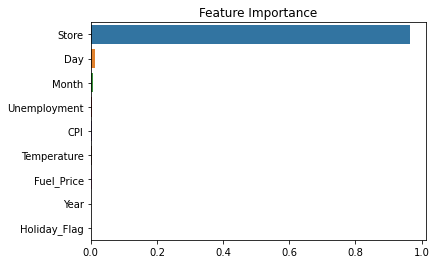

In [45]:
feat_imp = pd.Series(dec_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance');

In [46]:
# building the model
random_forest = RandomForestRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,15),
    'n_estimators': np.arange(25,101,25)
}
random_forest = tune_and_evaluate(random_forest,param_grid)

Best parameters are:  {'max_depth': 14, 'n_estimators': 100}
Mean cross-validated score of the best_estimator is:  0.9681818502578976
-------------------------------------------------------------------
Training set Accuracy: 99.4
Test set Accuracy: 97.2


In [47]:
from xgboost import XGBRegressor

In [52]:
for col in X_train.columns:
    X_train[col]=X_train[col].astype(int)
    X_test[col]=X_test[col].astype(int)

In [ ]:
# building the model
xgb = XGBRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,10),
    'n_estimators': np.arange(20,201,20)
}

xgb = tune_and_evaluate(xgb,param_grid)

# tunning the model
grid_search = GridSearchCV(estimator= xgb,param_grid= param_grid,cv=5,scoring='r2')
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best parameters are: ",best_params)
print('Mean cross-validated score of the best_estimator is: ',best_score)
print('-------------------------------------------------------------------')
    
# best estimator evaluation
print("Training set Accuracy:",round(best_estimator.score(X_train,y_train),3)*100)
print("Test set Accuracy:",round(best_estimator.score(X_test,y_test),3)*100)

Best parameters are:  {'max_depth': 4, 'n_estimators': 80}
Mean cross-validated score of the best_estimator is:  0.8427157784176147
-------------------------------------------------------------------
Training set Accuracy: 86.8
Test set Accuracy: 85.3
